# FoodPanda Delivery Analysis
## Introduction
The objective is to gain a detailed understanding of Foodpanda’s customer ordering behavior, seasonal patterns, and operational performance to support insights and decision-making in food delivery services.

## Questions to Answer
1. How have Foodpanda’s customer orders changed over time on a monthly basis?
2. What seasonal patterns exist in Foodpanda orders?
3. Which gender–age group combinations contribute the most revenue?
4. Which cities and restaurants experience the most delivery issues?
5. Which restaurants generate the highest revenue, and how does that compare to their number of orders?

## Import Libraries and Data

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import calendar

#load data
df = pd.read_csv("Foodpanda Analysis Dataset.csv")

## Explore Data

In [8]:
#explore data
df.columns

Index(['customer_id', 'gender', 'age', 'city', 'signup_date', 'order_id',
       'order_date', 'restaurant_name', 'dish_name', 'category', 'quantity',
       'price', 'payment_method', 'order_frequency', 'last_order_date',
       'loyalty_points', 'churned', 'rating', 'rating_date',
       'delivery_status'],
      dtype='object')

In [9]:
df.head()

,customer_id,gender,age,city,signup_date,order_id,order_date,restaurant_name,dish_name,category,quantity,price,payment_method,order_frequency,last_order_date,loyalty_points,churned,rating,rating_date,delivery_status
0,C5663,Male,Adult,Peshawar,1/14/2024,O9663,8/23/2023,McDonald's,Burger,Italian,5,1478.27,Cash,38,7/19/2025,238,Active,3,10/14/2024,Cancelled
1,C2831,Male,Adult,Multan,7/7/2024,O6831,8/23/2023,KFC,Burger,Italian,3,956.04,Wallet,24,11/25/2024,81,Active,2,8/21/2025,Delayed
2,C2851,Other,Senior,Multan,6/20/2025,O6851,8/23/2023,Pizza Hut,Fries,Italian,2,882.51,Cash,42,5/10/2025,82,Inactive,3,9/19/2024,Delayed
3,C1694,Female,Senior,Peshawar,9/5/2023,O5694,8/23/2023,Subway,Pizza,Dessert,4,231.30,Card,27,7/24/2025,45,Inactive,2,6/29/2025,Delayed
4,C4339,Other,Senior,Lahore,12/29/2023,O8339,8/24/2023,KFC,Sandwich,Dessert,1,1156.69,Cash,35,12/21/2024,418,Inactive,3,3/6/2025,Cancelled


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      6000 non-null   object 
 1   gender           6000 non-null   object 
 2   age              6000 non-null   object 
 3   city             6000 non-null   object 
 4   signup_date      6000 non-null   object 
 5   order_id         6000 non-null   object 
 6   order_date       6000 non-null   object 
 7   restaurant_name  6000 non-null   object 
 8   dish_name        6000 non-null   object 
 9   category         6000 non-null   object 
 10  quantity         6000 non-null   int64  
 11  price            6000 non-null   float64
 12  payment_method   6000 non-null   object 
 13  order_frequency  6000 non-null   int64  
 14  last_order_date  6000 non-null   object 
 15  loyalty_points   6000 non-null   int64  
 16  churned          6000 non-null   object 
 17  rating        

In [11]:
df.shape

(6000, 20)

## Analyse Data

### Q1. How have Foodpanda’s customer orders changed over time on a monthly basis?

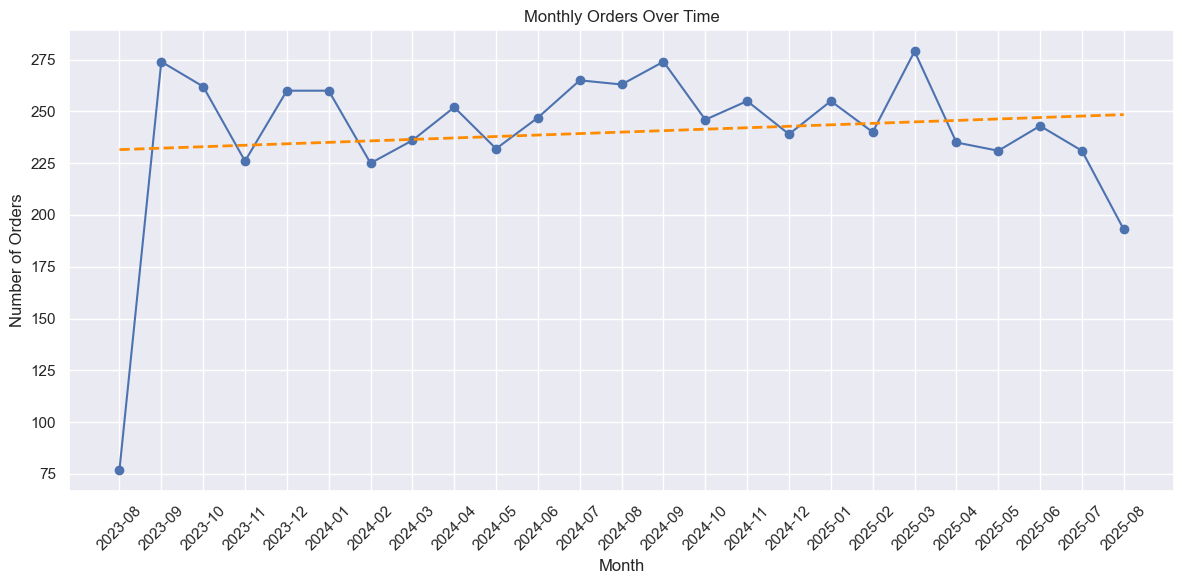

In [22]:
#data prep
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['order_month'] = df['order_date'].dt.to_period('M')
monthly_orders = df.groupby('order_month')['order_id'].count()
x = np.arange(len(monthly_orders))
y = monthly_orders.values
m, b = np.polyfit(x, y, 1)

#create graph
sns.set_theme(palette="deep")
plt.figure(figsize=(12,6))
plt.plot(monthly_orders.index.astype(str), y, marker='o', label='Monthly Orders')
plt.plot(monthly_orders.index.astype(str), m*x + b, color='darkorange', linestyle='--', linewidth=2)
plt.title("Monthly Orders Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Q2. What seasonal patterns exist in Foodpanda orders?

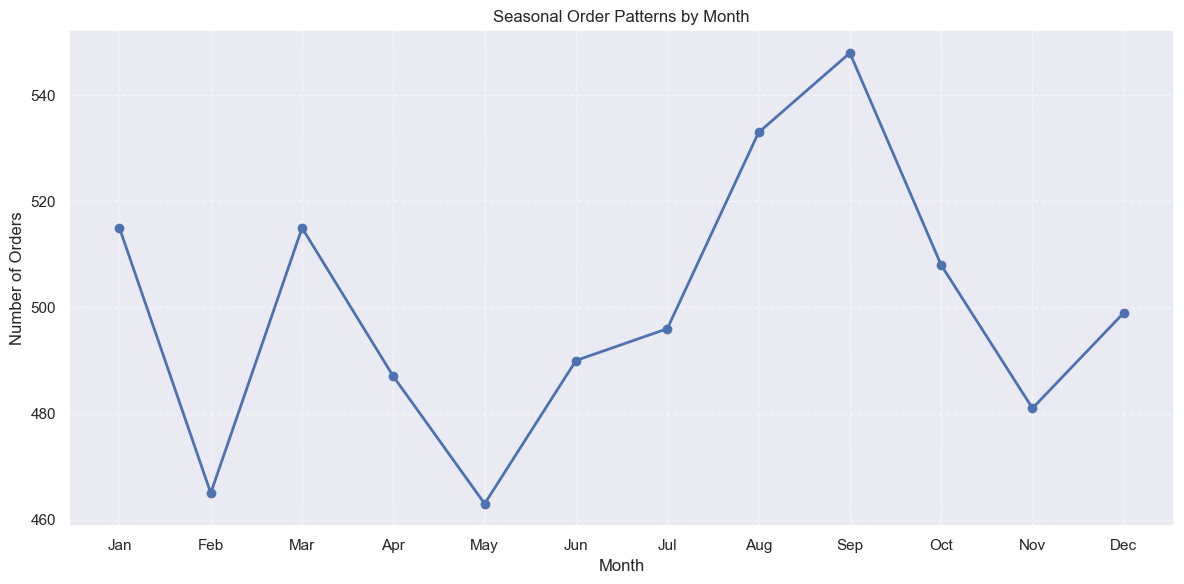

In [23]:
#data prep
df['order_month_num'] = df['order_date'].dt.month
seasonal_orders = df.groupby('order_month_num')['order_id'].count()
month_names = [calendar.month_abbr[i] for i in seasonal_orders.index]

#create graph
plt.figure(figsize=(12,6))
plt.plot(month_names, seasonal_orders.values, marker='o', linewidth=2)
plt.title("Seasonal Order Patterns by Month")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Q3. Which gender–age group combinations contribute the most revenue?

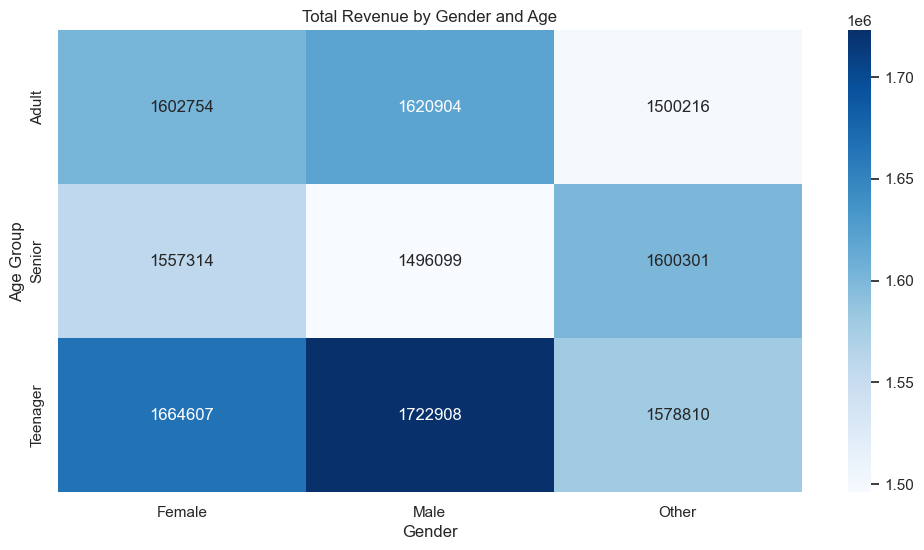

In [14]:
#data prep
df['total_order_value'] = df['quantity'] * df['price']
pivot = df.pivot_table(
    index='age',
    columns='gender',
    values='total_order_value',
    aggfunc='sum'
)

#create graph
plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="Blues")
plt.title("Total Revenue by Gender and Age")
plt.xlabel("Gender")
plt.ylabel("Age Group")
plt.show()

### Q4. Which cities and restaurants experience the most delivery issues?

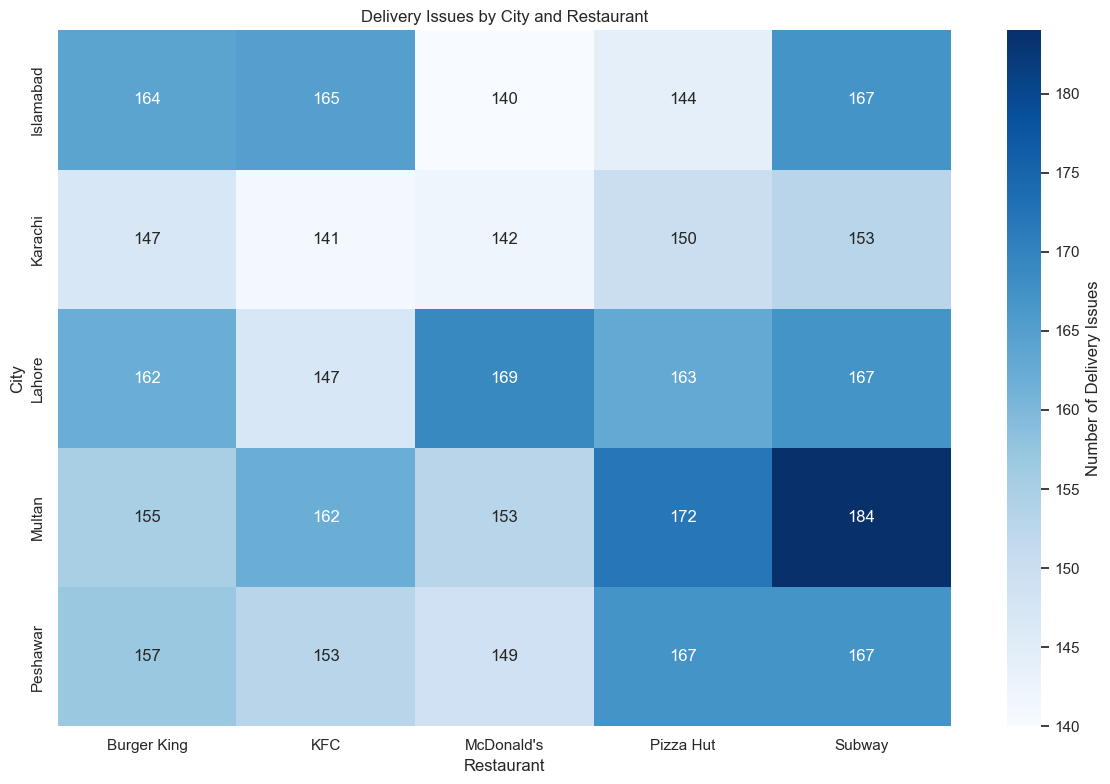

In [15]:
#data prep
df['is_delayed'] = df['delivery_status'].apply(lambda x: 1 if x.lower() == 'delayed' else 0)
df['is_cancelled'] = df['delivery_status'].apply(lambda x: 1 if x.lower() == 'cancelled' else 0)
df['delivery_issues'] = df['is_delayed'] + df['is_cancelled']
issues_pivot = df.pivot_table(
    index='city',
    columns='restaurant_name',
    values='delivery_issues',
    aggfunc='sum',
    fill_value=0
)

#create graph
plt.figure(figsize=(12,8))
sns.heatmap(issues_pivot, annot=True, fmt='d', cmap='Blues', cbar_kws={'label':'Number of Delivery Issues'})
plt.title("Delivery Issues by City and Restaurant")
plt.xlabel("Restaurant")
plt.ylabel("City")
plt.tight_layout()
plt.show()


### Q5. Which restaurants generate the highest revenue, and how does that compare to their number of orders?

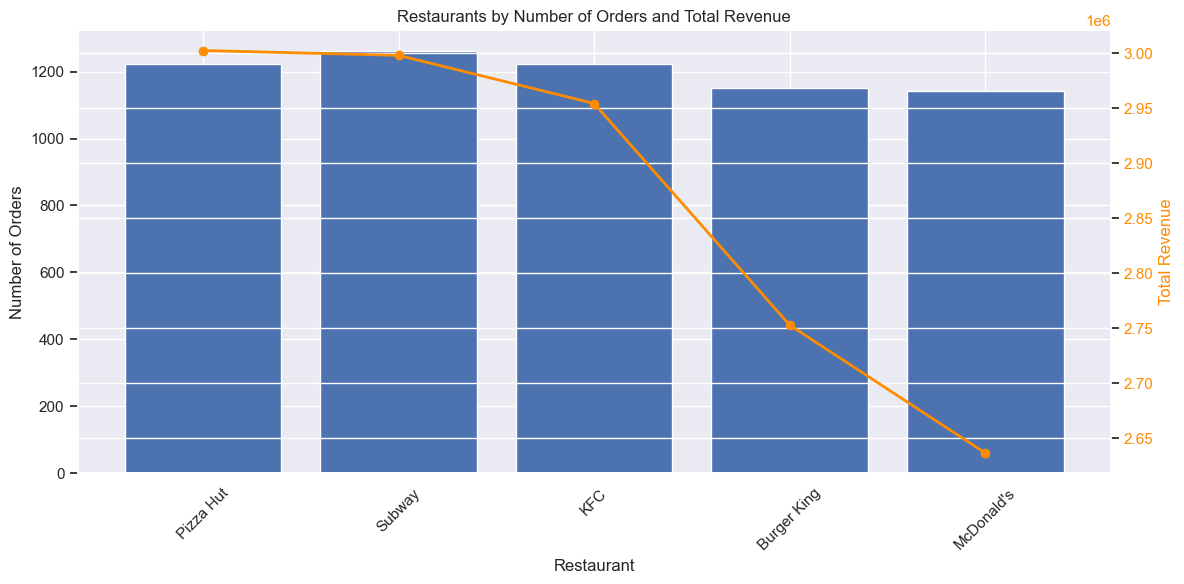

In [20]:
# prepare data
df['total_order_value'] = df['quantity'] * df['price']
restaurant_stats = df.groupby('restaurant_name').agg(
    total_revenue=('total_order_value', 'sum'),
    num_orders=('order_id', 'count')
).sort_values('total_revenue', ascending=False).head(10)

# plot graph
fig, ax1 = plt.subplots(figsize=(12,6))
bars = ax1.bar(restaurant_stats.index, restaurant_stats['num_orders'], label='Number of Orders')
ax1.set_xlabel("Restaurant")
ax1.set_ylabel("Number of Orders")
ax1.tick_params(axis='y')
ax1.set_xticks(range(len(restaurant_stats.index)))
ax1.set_xticklabels(restaurant_stats.index, rotation=45)

ax2 = ax1.twinx()
ax2.plot(range(len(restaurant_stats.index)), restaurant_stats['total_revenue'], 
         color='darkorange', marker='o', linewidth=2, label='Total Revenue')
ax2.set_ylabel("Total Revenue", color='darkorange')
ax2.tick_params(axis='y', labelcolor='darkorange')

plt.title("Restaurants by Number of Orders and Total Revenue")
fig.tight_layout()
plt.show()
